In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\bsnra\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
os.getcwd()

'c:\\Users\\bsnra\\Desktop\\chandassu\\examples'

In [3]:
base_path= r"c:\\Users\\bsnra\\Desktop\\chandassu\\dataset\\score"
os.chdir( base_path )

merged_df= pd.DataFrame()

for satakam in os.listdir():

    df= pd.read_excel( satakam )

    if merged_df.shape[0] == 0:
        merged_df= df
        continue

    merged_df= pd.concat( [merged_df, df] )

In [4]:
merged_df["satakam"].value_counts()

satakam
vemana                    1163
aandhranaayaka             212
venugopaala                210
laavanya                   200
narasimha                  200
madanagopala               200
kukkuteswara               184
sarveswara                 144
taadimallaraajagopaala     130
ontimittaraguveera         120
sampangimanna              120
srikaalahasteeswara        119
maaruthi                   116
bhaskara                   109
vrushadhipa                109
sumathi                    108
naarayana                  105
kumaara                    104
daasarathi                 103
krishna                    101
bhaktamandaara             101
bharga                     101
devakinandana              101
maathru                    100
kumaarii                   100
venkateswara               100
chiravibhava                96
sundariimani                95
Name: count, dtype: int64

In [5]:
merged_df["class"].value_counts()

class
vupajaathi    2323
vruttamu      1665
jaathi         663
Name: count, dtype: int64

In [6]:
merged_df= merged_df.reset_index( drop= True )
merged_df.index

RangeIndex(start=0, stop=4651, step=1)

In [7]:
merged_df.loc[ merged_df["type"]=="vutpalamaala", "class" ]= "vruttamu"
merged_df.loc[ merged_df["type"]=="champakamaala", "class" ]= "vruttamu"
merged_df.loc[ merged_df["type"]=="saardulamu", "class" ]= "vruttamu"
merged_df.loc[ merged_df["type"]=="mattebhamu", "class" ]= "vruttamu"

merged_df.loc[ merged_df["type"]=="kandamu", "class" ]= "jaathi"

merged_df.loc[ merged_df["type"]=="aataveladi", "class" ]= "vupajaathi"
merged_df.loc[ merged_df["type"]=="teytageethi", "class" ]= "vupajaathi"
merged_df.loc[ merged_df["type"]=="seesamu", "class" ]= "vupajaathi"

In [8]:
merged_df["class"].value_counts()

class
vupajaathi    2343
vruttamu      1625
jaathi         683
Name: count, dtype: int64

In [9]:
merged_df["type"].value_counts()

type
aataveladi       995
kandamu          683
teytageethi      676
seesamu          672
mattebhamu       617
champakamaala    389
vutpalamaala     329
saardulamu       290
Name: count, dtype: int64

In [10]:
satakam= merged_df["satakam"].value_counts()
satakam

satakam
vemana                    1163
aandhranaayaka             212
venugopaala                210
laavanya                   200
narasimha                  200
madanagopala               200
kukkuteswara               184
sarveswara                 144
taadimallaraajagopaala     130
ontimittaraguveera         120
sampangimanna              120
srikaalahasteeswara        119
maaruthi                   116
bhaskara                   109
vrushadhipa                109
sumathi                    108
naarayana                  105
kumaara                    104
daasarathi                 103
krishna                    101
bhaktamandaara             101
bharga                     101
devakinandana              101
maathru                    100
kumaarii                   100
venkateswara               100
chiravibhava                96
sundariimani                95
Name: count, dtype: int64

In [11]:
sum(satakam.values)

4651

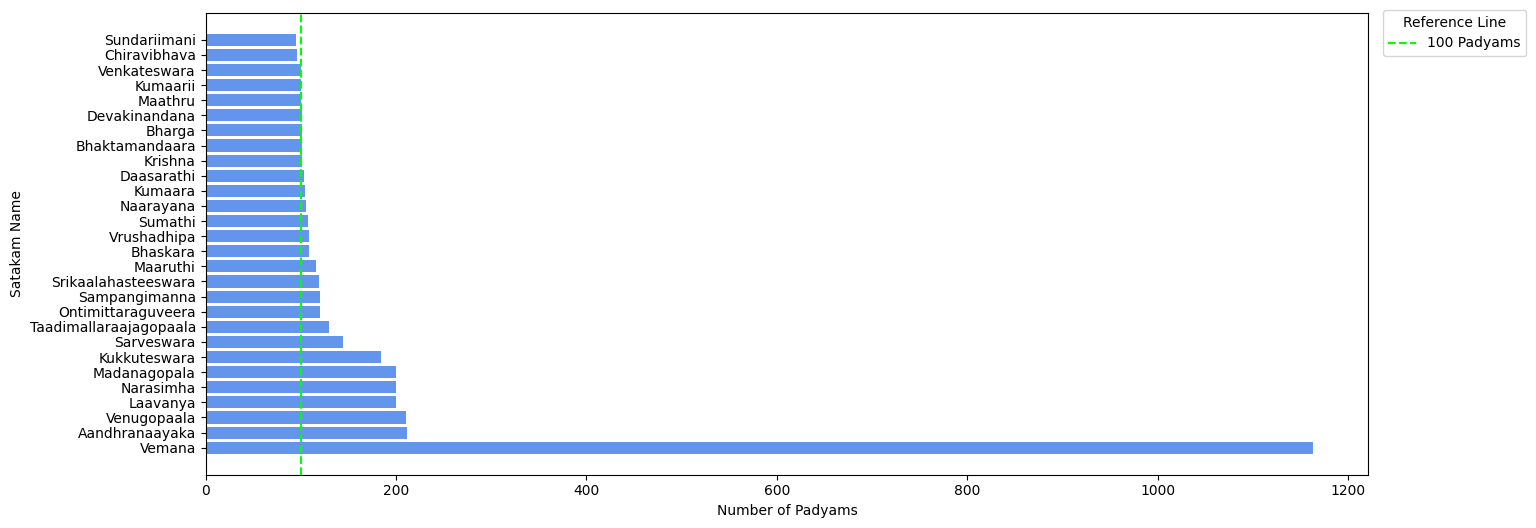

In [74]:
plt.figure( figsize= (15, 6) )

plt.barh( range(satakam.shape[0]), satakam.values, color= "cornflowerblue" )
plt.axvline(x=100, color='lime', linestyle='--', label='100 Padyams')
# plt.axvline(x=200, color='green', linestyle='--', label='Vupajaathi Satakam')

plt.xlabel("Number of Padyams")
plt.ylabel("Satakam Name")

plt.yticks( range(satakam.shape[0]), satakam.index )
# plt.title("Distribution of no.of Padyams from each Satakam")
plt.legend(
            title= "Reference Line",
            loc='upper right',
            bbox_to_anchor=(1.142, 1.021)
           )

plt.show()

In [26]:
merged_df["type"].value_counts()

type
aataveladi       995
kandamu          683
teytageethi      676
seesamu          672
mattebhamu       617
champakamaala    389
vutpalamaala     329
saardulamu       290
Name: count, dtype: int64

In [13]:
merged_df["satakam"]= merged_df["satakam"].str.title()

In [14]:
merged_df.head(1)

,type,padyam,class,satakam,lg,chandassu_score,n_aksharalu_score,n_paadalu_score,gana_kramam_score,yati_sthanam_score,prasa_score
0,seesamu,శ్రీమదనంత లక్ష్మీ యుతోరః స్థల- చతురాననాండ పూరి...,vupajaathi,Aandhranaayaka,"[('శ్రీ', 'U'), ('మ', '|'), ('ద', '|'), ('నం',...",0.802083,-1.0,1.0,0.78125,0.625,-1.0


In [15]:
import os
os.getcwd()

'c:\\Users\\bsnra\\Desktop\\chandassu\\dataset\\score'

In [16]:
merged_df.to_excel( "c:\\Users\\bsnra\\Desktop\\chandassu\\Dataset.xlsx", index= None )

### Our Results

In [12]:
print( f"Chandassu Score      : {round( 100*merged_df['chandassu_score'].mean(), 2 )}%" )
print( f"N-Paadaalu Score     : {round( 100*merged_df['n_paadalu_score'].mean(), 2 )}%" )
print( f"Gana Kramam Score    : {round( 100*merged_df['gana_kramam_score'].mean(), 2 )}%" )
print( f"Yati Sthanam Score   : {round( 100*merged_df['yati_sthanam_score'].mean(), 2 )}%" )

Chandassu Score      : 91.73%
N-Paadaalu Score     : 99.93%
Gana Kramam Score    : 93.82%
Yati Sthanam Score   : 78.69%


In [14]:
# These depend on the 'Class' of Padyam
temp= merged_df[ (merged_df["n_aksharalu_score"] != -1) ]

print( f"N-Aksharalu Score    : {round( 100*temp['n_aksharalu_score'].mean(), 2 )}%" )

N-Aksharalu Score    : 99.43%


In [15]:
# These depend on the 'Class' of Padyam
temp= merged_df[ (merged_df["prasa_score"] != -1) ]

print( f"Prasa Score          : {round( 100*temp['prasa_score'].mean(), 2 )}%" )

Prasa Score          : 94.54%


### Satakam-wise Evaluation

In [8]:
chandassu_score= (merged_df.groupby( "satakam" )["chandassu_score"].mean().sort_values( ascending= False )*100).to_dict()
chandassu_score

{'Maathru': 96.67142857142858,
 'Chiravibhava': 96.46825396825398,
 'Bharga': 96.0583451202263,
 'Srikaalahasteeswara': 95.67114740633096,
 'Ontimittaraguveera': 95.35238095238095,
 'Sarveswara': 95.27926587301587,
 'Naarayana': 94.7923916935195,
 'Devakinandana': 94.59534355691208,
 'Daasarathi': 94.39089227924178,
 'Vrushadhipa': 94.18698121450416,
 'Kukkuteswara': 93.76585144927536,
 'Bhaskara': 93.48547400611619,
 'Narasimha': 93.396875,
 'Laavanya': 93.09583333333333,
 'Bhaktamandaara': 92.57567185289957,
 'Sundariimani': 92.0329573934837,
 'Madanagopala': 91.421875,
 'Vemana': 91.35457611677516,
 'Sumathi': 91.21817129629629,
 'Sampangimanna': 90.72916666666667,
 'Maaruthi': 90.64032927145449,
 'Taadimallaraajagopaala': 90.49839743589743,
 'Kumaara': 89.70853365384616,
 'Venkateswara': 89.49380952380952,
 'Venugopaala': 88.62103174603175,
 'Krishna': 88.30445544554455,
 'Kumaarii': 87.90625,
 'Aandhranaayaka': 80.10220125786164}

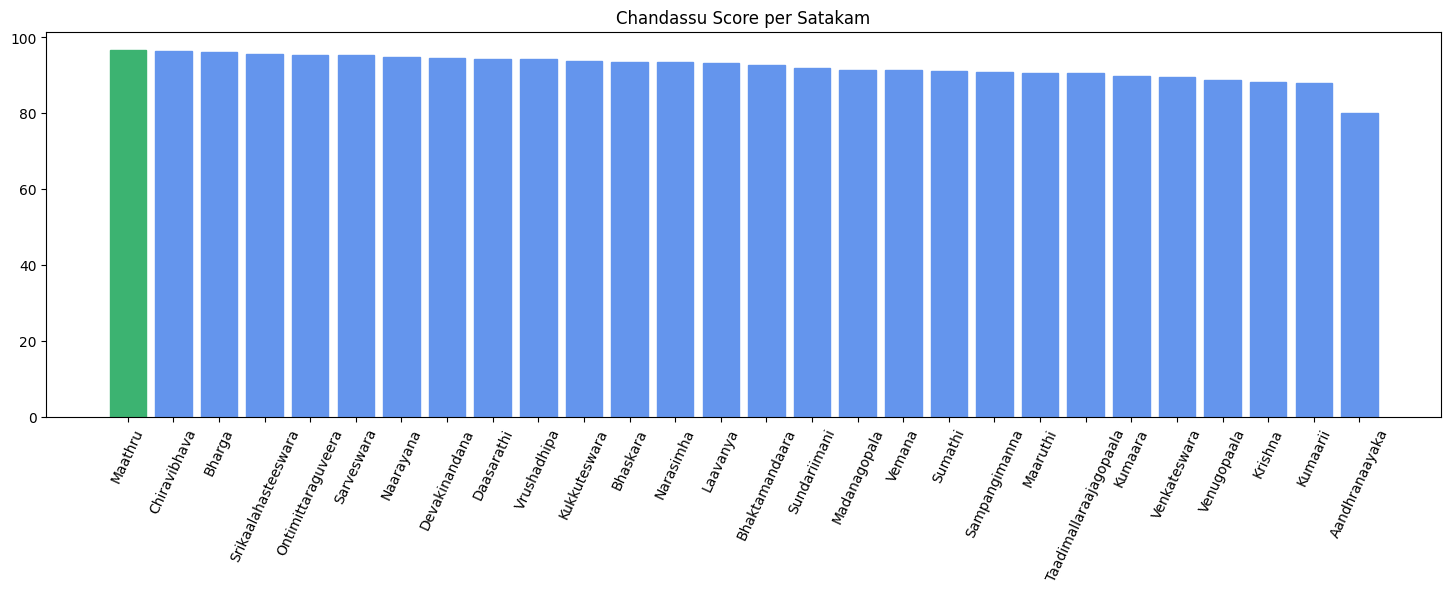

In [10]:
plt.figure( figsize= (18, 5) )
bars= plt.bar( range(len(chandassu_score)), chandassu_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Chandassu Score per Satakam" )
plt.xticks( range(len(chandassu_score)), [i.title() for i in chandassu_score.keys() ], rotation= 65 )
plt.show()

In [11]:
n_paadalu_score= (merged_df.groupby( "satakam" )["n_paadalu_score"].mean().sort_values( ascending= False )*100).to_dict()
n_paadalu_score

{'Aandhranaayaka': 100.0,
 'Maaruthi': 100.0,
 'Vemana': 100.0,
 'Sumathi': 100.0,
 'Srikaalahasteeswara': 100.0,
 'Sarveswara': 100.0,
 'Sampangimanna': 100.0,
 'Ontimittaraguveera': 100.0,
 'Narasimha': 100.0,
 'Naarayana': 100.0,
 'Bhaktamandaara': 100.0,
 'Maathru': 100.0,
 'Vrushadhipa': 100.0,
 'Kumaarii': 100.0,
 'Kumaara': 100.0,
 'Kukkuteswara': 100.0,
 'Krishna': 100.0,
 'Devakinandana': 100.0,
 'Daasarathi': 100.0,
 'Chiravibhava': 100.0,
 'Bhaskara': 100.0,
 'Bharga': 100.0,
 'Laavanya': 99.9375,
 'Venugopaala': 99.82142857142857,
 'Sundariimani': 99.73684210526315,
 'Taadimallaraajagopaala': 99.71153846153847,
 'Madanagopala': 99.375,
 'Venkateswara': 99.25}

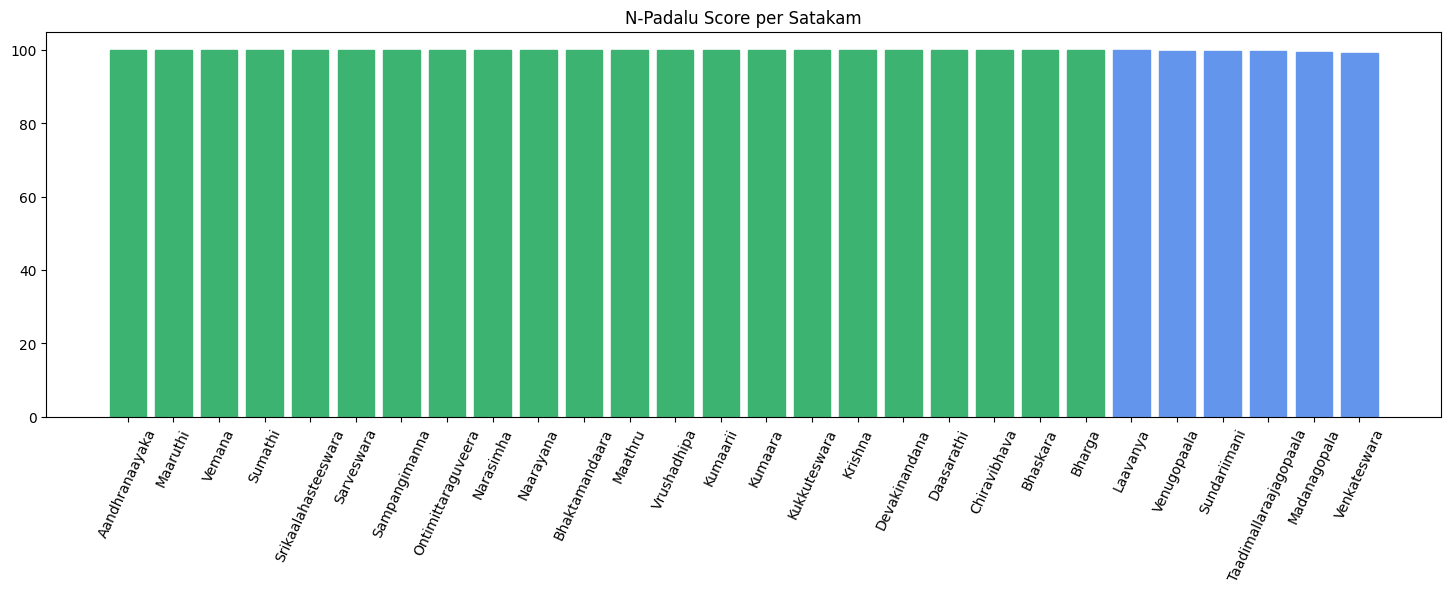

In [12]:
plt.figure( figsize= (18, 5) )
bars= plt.bar( range(len(n_paadalu_score)), n_paadalu_score.values() )
for i in range( 22 ):
    bars[i].set_color( "mediumseagreen" )

for i in range( 22, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "N-Padalu Score per Satakam" )
plt.xticks( range(len(n_paadalu_score)), [i.title() for i in n_paadalu_score.keys() ], rotation= 65 )
plt.show()

In [13]:
gana_kramam_score= (merged_df.groupby( "satakam" )["gana_kramam_score"].mean().sort_values( ascending= False )*100).to_dict()
gana_kramam_score

{'Maathru': 98.60714285714286,
 'Chiravibhava': 97.20982142857143,
 'Kukkuteswara': 96.24320652173914,
 'Laavanya': 96.0375,
 'Narasimha': 95.440625,
 'Ontimittaraguveera': 95.38690476190477,
 'Sarveswara': 95.33730158730158,
 'Bharga': 95.15558698727015,
 'Bhaskara': 95.11795543905636,
 'Madanagopala': 94.765625,
 'Vemana': 94.75479056626949,
 'Devakinandana': 94.66053748231967,
 'Daasarathi': 94.66019417475728,
 'Sumathi': 94.50231481481481,
 'Srikaalahasteeswara': 94.41776710684275,
 'Kumaara': 94.4110576923077,
 'Naarayana': 94.08163265306123,
 'Taadimallaraajagopaala': 93.22596153846153,
 'Kumaarii': 93.125,
 'Vrushadhipa': 92.82437745740498,
 'Venugopaala': 92.64880952380953,
 'Sampangimanna': 92.5,
 'Sundariimani': 92.29323308270678,
 'Krishna': 92.07920792079209,
 'Maaruthi': 90.85591133004925,
 'Bhaktamandaara': 88.22489391796323,
 'Venkateswara': 87.89285714285714,
 'Aandhranaayaka': 84.76415094339623}

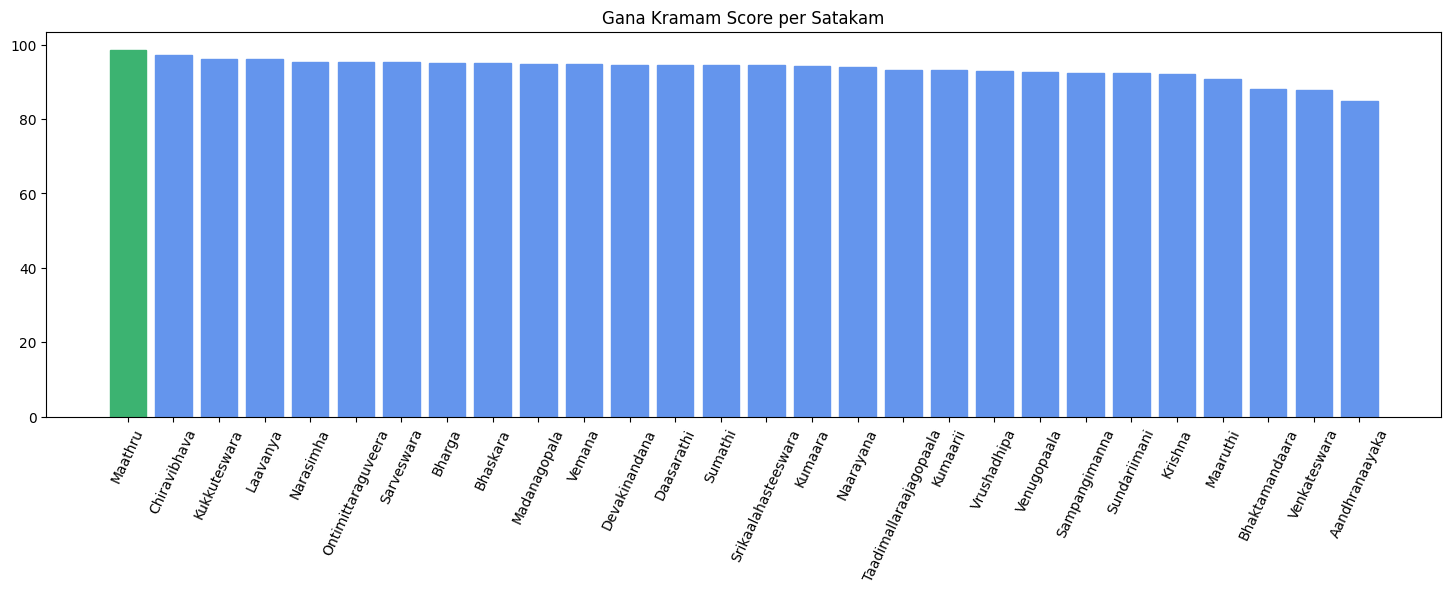

In [14]:
plt.figure( figsize= (18, 5) )
bars= plt.bar( range(len(gana_kramam_score)), gana_kramam_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Gana Kramam Score per Satakam" )
plt.xticks( range(len(gana_kramam_score)), [i.title() for i in gana_kramam_score.keys() ], rotation= 65 )
plt.show()

In [15]:
yati_sthanam_score= (merged_df.groupby( "satakam" )["yati_sthanam_score"].mean().sort_values( ascending= False )*100).to_dict()
yati_sthanam_score

{'Maathru': 88.5,
 'Chiravibhava': 87.5,
 'Srikaalahasteeswara': 86.76470588235294,
 'Bharga': 85.89108910891089,
 'Kukkuteswara': 85.05434782608695,
 'Narasimha': 84.75,
 'Naarayana': 84.04761904761905,
 'Ontimittaraguveera': 83.75,
 'Laavanya': 83.3125,
 'Daasarathi': 82.76699029126213,
 'Vrushadhipa': 82.56880733944955,
 'Bhaktamandaara': 82.42574257425743,
 'Devakinandana': 82.42574257425743,
 'Sarveswara': 81.77083333333334,
 'Madanagopala': 80.125,
 'Vemana': 79.11650902837489,
 'Taadimallaraajagopaala': 78.5576923076923,
 'Sumathi': 78.24074074074075,
 'Bhaskara': 77.06422018348624,
 'Sampangimanna': 76.66666666666667,
 'Sundariimani': 75.0,
 'Venugopaala': 73.39285714285714,
 'Kumaara': 72.59615384615384,
 'Venkateswara': 71.75,
 'Krishna': 71.28712871287128,
 'Kumaarii': 70.5,
 'Maaruthi': 69.61206896551724,
 'Aandhranaayaka': 55.54245283018868}

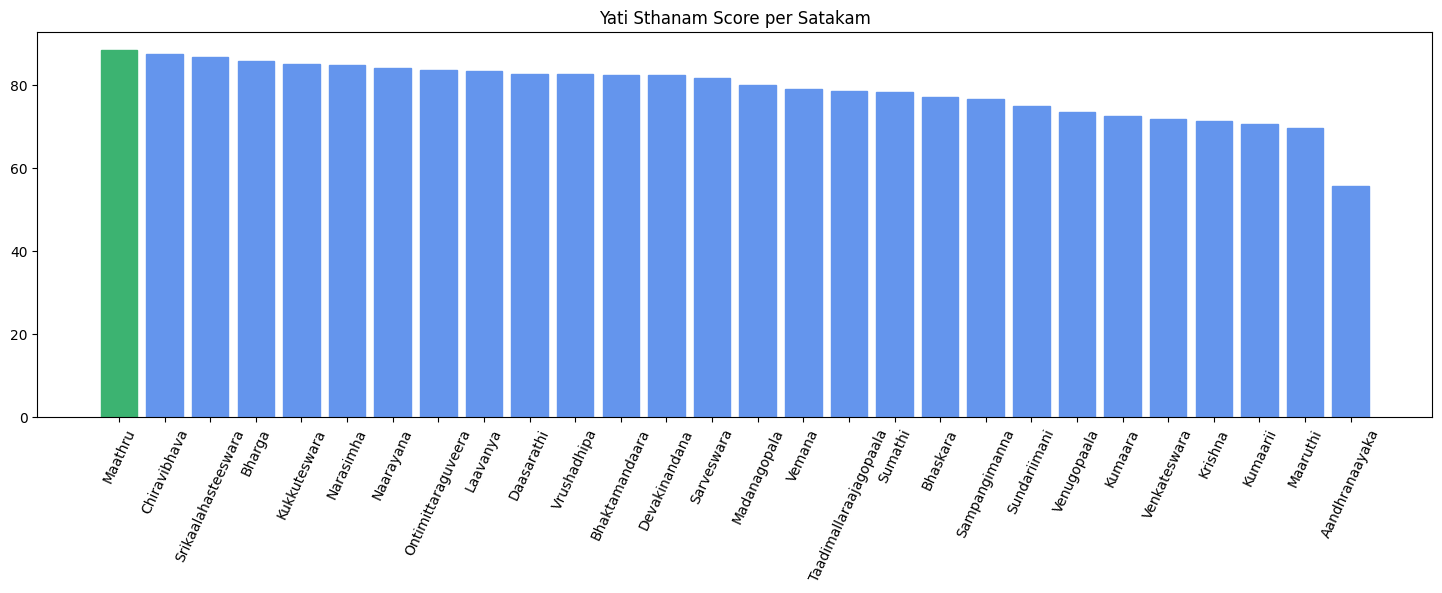

In [16]:
plt.figure( figsize= (18, 5) )
bars= plt.bar( range(len(yati_sthanam_score)), yati_sthanam_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Yati Sthanam Score per Satakam" )
plt.xticks( range(len(yati_sthanam_score)), [i.title() for i in yati_sthanam_score.keys() ], rotation= 65 )
plt.show()

### Class-wise Evaluation

In [16]:
merged_df["class"].unique()

array(['vupajaathi', 'vruttamu', 'jaathi'], dtype=object)

In [18]:
chandassu_score= (merged_df.groupby( "class" )["chandassu_score"].mean().sort_values( ascending= False )*100).to_dict()
chandassu_score

{'vruttamu': 94.13117177559283,
 'vupajaathi': 90.74628325508607,
 'jaathi': 89.39192898975111}

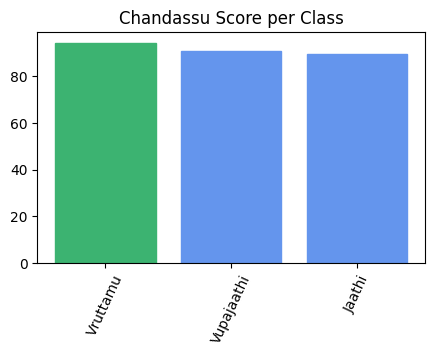

In [19]:
plt.figure( figsize= (5, 3) )
bars= plt.bar( range(len(chandassu_score)), chandassu_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Chandassu Score per Class" )
plt.xticks( range(len(chandassu_score)), [i.title() for i in chandassu_score.keys() ], rotation= 65 )
plt.show()

In [20]:
n_paadalu_score= (merged_df.groupby( "class" )["n_paadalu_score"].mean().sort_values( ascending= False )*100).to_dict()
n_paadalu_score

{'jaathi': 100.0,
 'vruttamu': 99.93846153846154,
 'vupajaathi': 99.90930431071277}

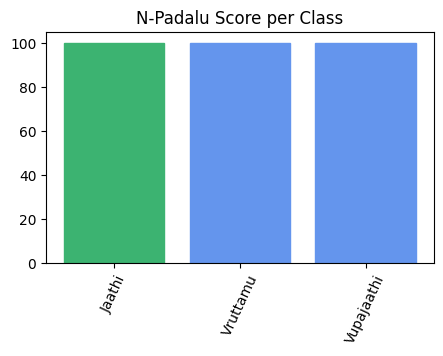

In [21]:
plt.figure( figsize= (5, 3) )
bars= plt.bar( range(len(n_paadalu_score)), n_paadalu_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "N-Padalu Score per Class" )
plt.xticks( range(len(n_paadalu_score)), [i.title() for i in n_paadalu_score.keys() ], rotation= 65 )
plt.show()

In [22]:
gana_kramam_score= (merged_df.groupby( "class" )["gana_kramam_score"].mean().sort_values( ascending= False )*100).to_dict()
gana_kramam_score

{'vupajaathi': 94.11785104566796,
 'vruttamu': 93.78461538461539,
 'jaathi': 92.85322108345534}

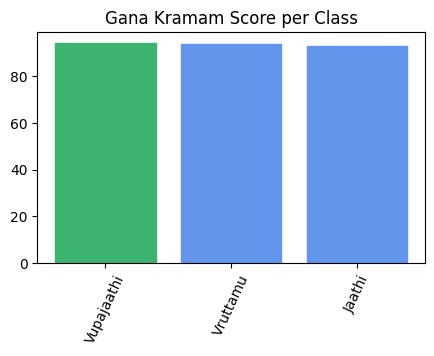

In [23]:
plt.figure( figsize= (5, 3) )
bars= plt.bar( range(len(gana_kramam_score)), gana_kramam_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Gana Kramam Score per Class" )
plt.xticks( range(len(gana_kramam_score)), [i.title() for i in gana_kramam_score.keys() ], rotation= 65 )
plt.show()

In [24]:
yati_sthanam_score= (merged_df.groupby( "class" )["yati_sthanam_score"].mean().sort_values( ascending= False )*100).to_dict()
yati_sthanam_score

{'vruttamu': 81.38461538461539,
 'vupajaathi': 78.2116944088775,
 'jaathi': 73.9385065885798}

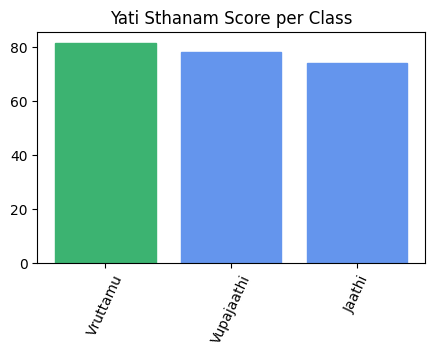

In [25]:
plt.figure( figsize= (5, 3) )
bars= plt.bar( range(len(yati_sthanam_score)), yati_sthanam_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Yati Sthanam Score per Class" )
plt.xticks( range(len(yati_sthanam_score)), [i.title() for i in yati_sthanam_score.keys() ], rotation= 65 )
plt.show()

In [26]:
prasa_score= (merged_df.groupby( "class" )["prasa_score"].mean().sort_values( ascending= False )*100).to_dict()
prasa_score

{'vruttamu': 96.12307692307692,
 'jaathi': 90.77598828696925,
 'vupajaathi': -100.0}

In [27]:
n_aksharalu_score= (merged_df.groupby( "class" )["n_aksharalu_score"].mean().sort_values( ascending= False )*100).to_dict()
n_aksharalu_score

{'vruttamu': 99.42508964719491, 'jaathi': -100.0, 'vupajaathi': -100.0}

In [28]:
chandassu_score

{'vruttamu': 94.13117177559283,
 'vupajaathi': 90.74628325508607,
 'jaathi': 89.39192898975111}

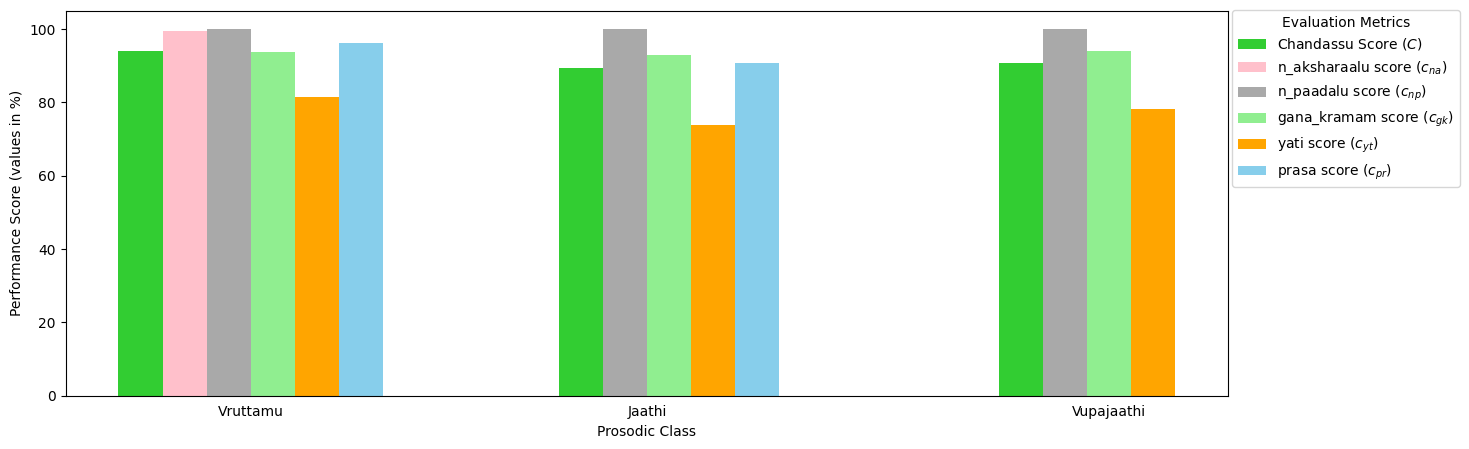

In [30]:
plt.figure( figsize= (15, 5) )
plt.bar( [10], [chandassu_score["vruttamu"]], width= 1, color= "limegreen" )
plt.bar( [11], [n_aksharalu_score["vruttamu"]], width= 1, color= "pink")
plt.bar( [12], [n_paadalu_score["vruttamu"]], width= 1, color= "darkgrey" )
plt.bar( [13], [gana_kramam_score["vruttamu"]], width= 1, color= "lightgreen" )
plt.bar( [14], [yati_sthanam_score["vruttamu"]], width= 1, color= "orange" )
plt.bar( [15], [prasa_score["vruttamu"]], width= 1, color= "skyblue")

plt.bar( [20], [chandassu_score["jaathi"]], width= 1, color= "limegreen" )
plt.bar( [21], [n_paadalu_score["jaathi"]], width= 1, color= "darkgrey" )
plt.bar( [22], [gana_kramam_score["jaathi"]], width= 1, color= "lightgreen" )
plt.bar( [23], [yati_sthanam_score["jaathi"]], width= 1, color= "orange" )
plt.bar( [24], [prasa_score["jaathi"]], width= 1, color= "skyblue")

plt.bar( [30], [chandassu_score["vupajaathi"]], width= 1, color= "limegreen")
plt.bar( [31], [n_paadalu_score["vupajaathi"]], width= 1, color= "darkgrey" )
plt.bar( [32], [gana_kramam_score["vupajaathi"]], width= 1, color= "lightgreen" )
plt.bar( [33], [yati_sthanam_score["vupajaathi"]], width= 1, color= "orange" )

plt.xlabel( "Prosodic Class" )
plt.ylabel( "Performance Score (values in %)")
plt.xticks( [12.5, 21.5, 32], [ "Vruttamu", "Jaathi", "Vupajaathi" ] )
plt.tick_params(bottom=False)

plt.legend( ["Chandassu Score $(C)$", "n_aksharaalu score $(c_{na})$", "n_paadalu score $(c_{np})$", "gana_kramam score $(c_{gk})$", "yati score $(c_{yt})$", "prasa score $(c_{pr})$"],
           title= "Evaluation Metrics",
           bbox_to_anchor=(1.205, 1.02), loc='upper right'
         )

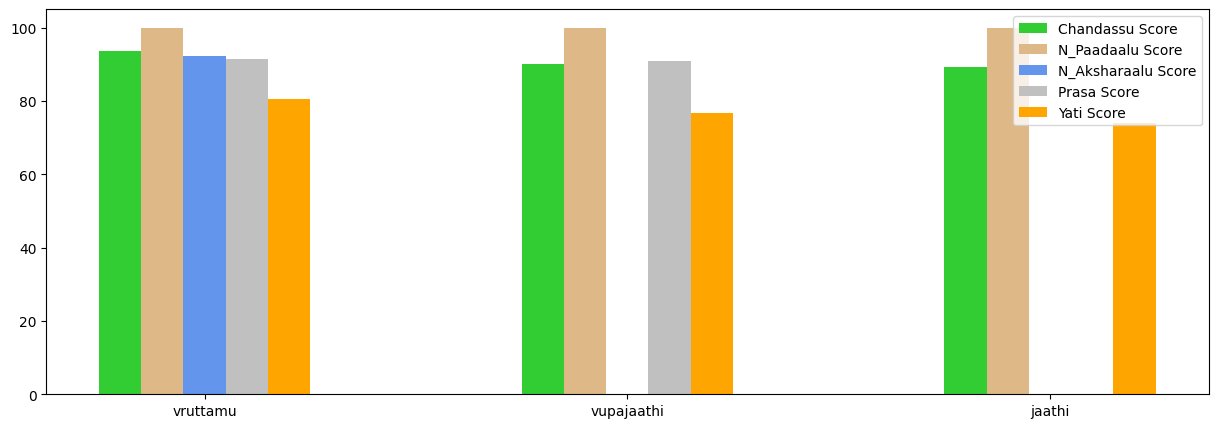

In [46]:
plt.figure( figsize= (15, 5) )
plt.bar( range(len(chandassu_score)), chandassu_score.values(), width= 0.1, color= "limegreen")
plt.bar( [0.1+ i for i in range(len(n_paadalu_score))], n_paadalu_score.values(), width= 0.1, color= "burlywood")
plt.bar( [0.2+ i for i in range(len(n_aksharalu_score))], [i if i!= -100 else 0 for i in n_aksharalu_score.values()], width= 0.1, color= "cornflowerblue")
plt.bar( [0.3+ i for i in range(len(prasa_score))], [i if i!= -100 else 0 for i in prasa_score.values()], width= 0.1, color= "silver")
plt.bar( [0.4+ i for i in range(len(yati_sthanam_score))], [i if i!= -100 else 0 for i in yati_sthanam_score.values()], width= 0.1, color= "orange")

plt.xticks([i+0.2 for i in range(len(chandassu_score))], chandassu_score.keys())

plt.legend(["Chandassu Score","N_Paadaalu Score", "N_Aksharaalu Score", "Prasa Score", "Yati Score"])

plt.show()

In [1]:
import seaborn as sb

df= pd.DataFrame( [chandassu_score] ).T
df

c:\Users\bsnra\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


NameError: name 'pd' is not defined

In [ ]:
chandassu_score, n_paadalu_score, gana_kramam_score, yati_sthanam_score

### Type-wise Evaluation

In [44]:
merged_df.head(1)

,type,padyam,class,satakam,lg,chandassu_score,n_aksharalu_score,n_paadalu_score,gana_kramam_score,yati_sthanam_score,prasa_score
0,seesamu,శ్రీమదనంత లక్ష్మీ యుతోరః స్థల- చతురాననాండ పూరి...,vupajaathi,aandhranaayaka,"[('శ్రీ', 'U'), ('మ', '|'), ('ద', '|'), ('నం',...",0.802083,-1.0,1.0,0.78125,0.625,-1.0


In [45]:
chandassu_score= (merged_df.groupby( "type" )["chandassu_score"].mean().sort_values( ascending= False )*100).to_dict()
chandassu_score

{'champakamaala': 94.9467499081895,
 'mattebhamu': 94.41028015744386,
 'saardulamu': 94.2938812548613,
 'vutpalamaala': 92.5,
 'aataveladi': 91.8676716917923,
 'seesamu': 90.00031001984128,
 'teytageethi': 89.83727810650886,
 'kandamu': 89.39192898975111}

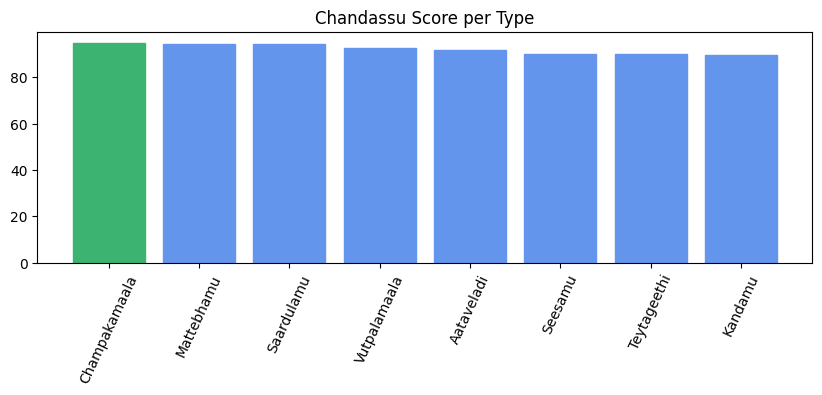

In [46]:
plt.figure( figsize= (10, 3) )
bars= plt.bar( range(len(chandassu_score)), chandassu_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Chandassu Score per Type" )
plt.xticks( range(len(chandassu_score)), [i.title() for i in chandassu_score.keys() ], rotation= 65 )
plt.show()

In [47]:
n_aksharalu_score= (merged_df.groupby( "type" )["n_aksharalu_score"].mean().sort_values( ascending= False )*100).to_dict()
n_aksharalu_score

{'mattebhamu': 99.62722852512155,
 'champakamaala': 99.54094748439222,
 'saardulamu': 99.35117967332123,
 'vutpalamaala': 98.97416413373861,
 'aataveladi': -100.0,
 'kandamu': -100.0,
 'seesamu': -100.0,
 'teytageethi': -100.0}

In [48]:
n_paadalu_score= (merged_df.groupby( "type" )["n_paadalu_score"].mean().sort_values( ascending= False )*100).to_dict()
n_paadalu_score

{'aataveladi': 100.0,
 'champakamaala': 100.0,
 'kandamu': 100.0,
 'mattebhamu': 100.0,
 'saardulamu': 100.0,
 'teytageethi': 99.85207100591717,
 'seesamu': 99.83258928571429,
 'vutpalamaala': 99.69604863221885}

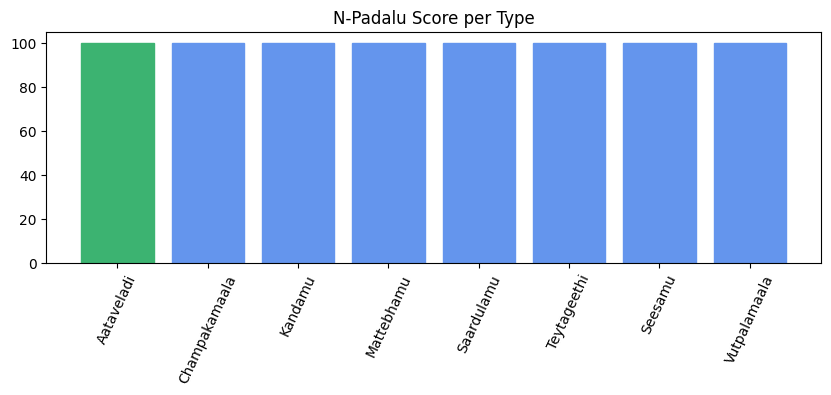

In [49]:
plt.figure( figsize= (10, 3) )
bars= plt.bar( range(len(n_paadalu_score)), n_paadalu_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "N-Padalu Score per Type" )
plt.xticks( range(len(n_paadalu_score)), [i.title() for i in n_paadalu_score.keys() ], rotation= 65 )
plt.show()

In [50]:
gana_kramam_score= (merged_df.groupby( "type" )["gana_kramam_score"].mean().sort_values( ascending= False )*100).to_dict()
gana_kramam_score

{'champakamaala': 96.01542416452442,
 'aataveladi': 95.42713567839196,
 'saardulamu': 94.8768472906404,
 'seesamu': 93.45703125,
 'mattebhamu': 92.88608474183839,
 'kandamu': 92.85322108345534,
 'teytageethi': 92.84763313609467,
 'vutpalamaala': 91.8693009118541}

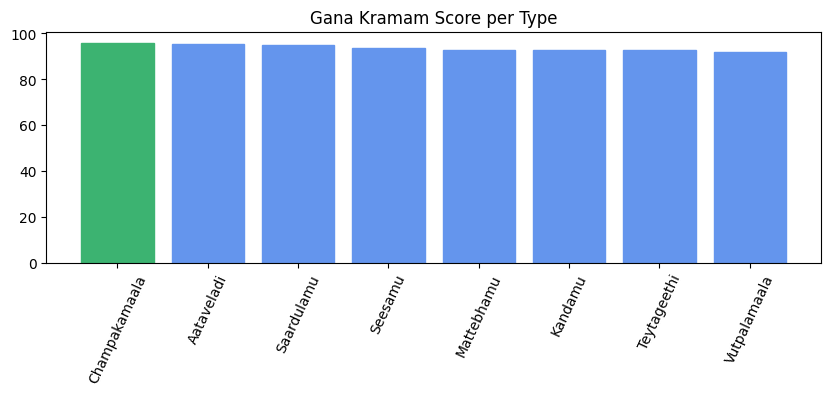

In [51]:
plt.figure( figsize= (10, 3) )
bars= plt.bar( range(len(gana_kramam_score)), gana_kramam_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Gana Kramam Score per Type" )
plt.xticks( range(len(gana_kramam_score)), [i.title() for i in gana_kramam_score.keys() ], rotation= 65 )
plt.show()

In [52]:
yati_sthanam_score= (merged_df.groupby( "type" )["yati_sthanam_score"].mean().sort_values( ascending= False )*100).to_dict()
yati_sthanam_score

{'champakamaala': 83.48329048843188,
 'mattebhamu': 83.0226904376013,
 'aataveladi': 80.17587939698493,
 'saardulamu': 79.65517241379311,
 'vutpalamaala': 77.35562310030394,
 'teytageethi': 76.81213017751479,
 'seesamu': 76.71130952380952,
 'kandamu': 73.9385065885798}

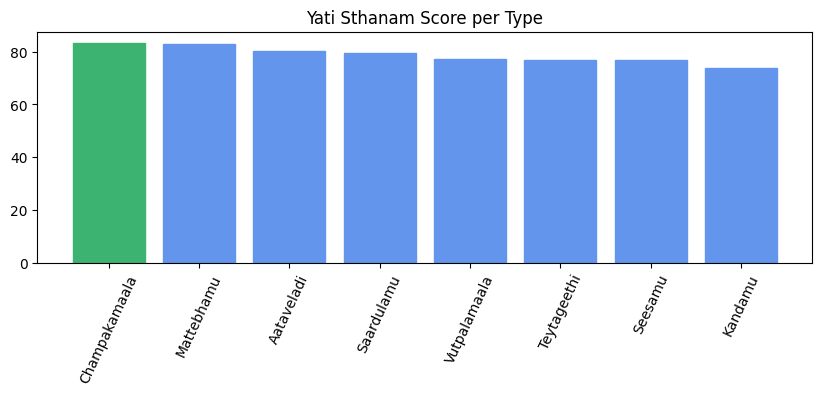

In [53]:
plt.figure( figsize= (10, 3) )
bars= plt.bar( range(len(yati_sthanam_score)), yati_sthanam_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Yati Sthanam Score per Type" )
plt.xticks( range(len(yati_sthanam_score)), [i.title() for i in yati_sthanam_score.keys() ], rotation= 65 )
plt.show()

In [54]:
prasa_score= (merged_df.groupby( "type" )["prasa_score"].mean().sort_values( ascending= False )*100).to_dict()
prasa_score


{'saardulamu': 97.58620689655172,
 'mattebhamu': 96.51539708265803,
 'champakamaala': 95.69408740359897,
 'vutpalamaala': 94.6048632218845,
 'kandamu': 90.77598828696925,
 'aataveladi': -100.0,
 'seesamu': -100.0,
 'teytageethi': -100.0}

In [55]:
prasa_score

{'saardulamu': 97.58620689655172,
 'mattebhamu': 96.51539708265803,
 'champakamaala': 95.69408740359897,
 'vutpalamaala': 94.6048632218845,
 'kandamu': 90.77598828696925,
 'aataveladi': -100.0,
 'seesamu': -100.0,
 'teytageethi': -100.0}

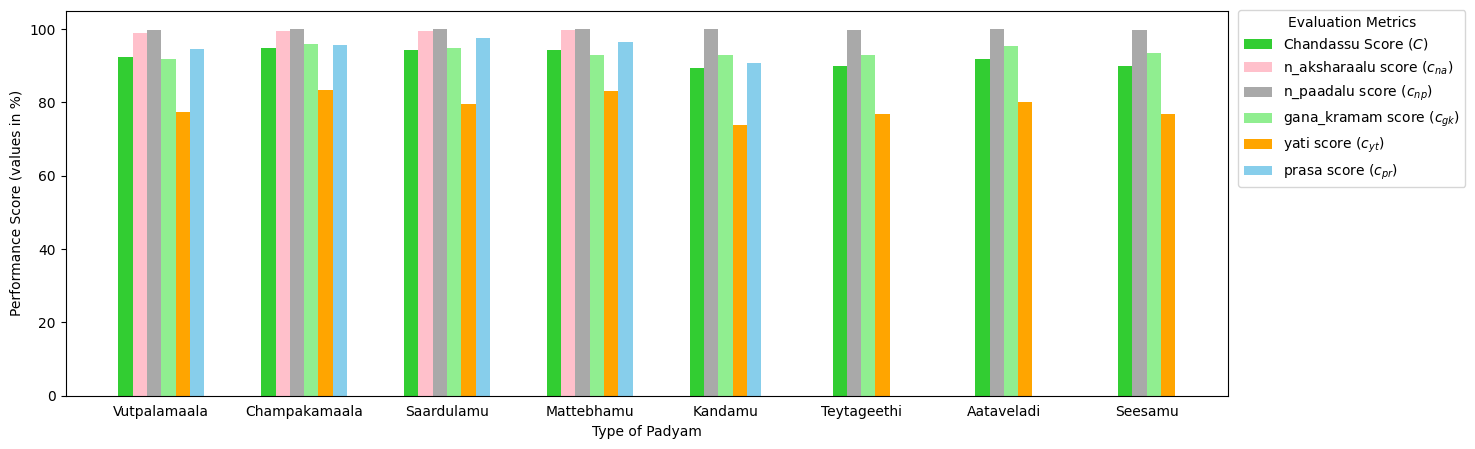

In [56]:
plt.figure( figsize= (15, 5) )

plt.bar([10], chandassu_score["vutpalamaala"], width= 1, color= "limegreen" )
plt.bar([11], n_aksharalu_score["vutpalamaala"], width= 1, color= "pink" )
plt.bar([12], n_paadalu_score["vutpalamaala"], width= 1, color= "darkgrey" )
plt.bar([13], gana_kramam_score["vutpalamaala"], width= 1, color= "lightgreen" )
plt.bar([14], yati_sthanam_score["vutpalamaala"], width= 1, color= "orange" )
plt.bar([15], prasa_score["vutpalamaala"], width= 1, color= "skyblue" )

plt.bar([20], chandassu_score["champakamaala"], width= 1, color= "limegreen" )
plt.bar([21], n_aksharalu_score["champakamaala"], width= 1, color= "pink" )
plt.bar([22], n_paadalu_score["champakamaala"], width= 1, color= "darkgrey" )
plt.bar([23], gana_kramam_score["champakamaala"], width= 1, color= "lightgreen" )
plt.bar([24], yati_sthanam_score["champakamaala"], width= 1, color= "orange" )
plt.bar([25], prasa_score["champakamaala"], width= 1, color= "skyblue" )

plt.bar([30], chandassu_score["saardulamu"], width= 1, color= "limegreen" )
plt.bar([31], n_aksharalu_score["saardulamu"], width= 1, color= "pink" )
plt.bar([32], n_paadalu_score["saardulamu"], width= 1, color= "darkgrey" )
plt.bar([33], gana_kramam_score["saardulamu"], width= 1, color= "lightgreen" )
plt.bar([34], yati_sthanam_score["saardulamu"], width= 1, color= "orange" )
plt.bar([35], prasa_score["saardulamu"], width= 1, color= "skyblue" )

plt.bar([40], chandassu_score["mattebhamu"], width= 1, color= "limegreen" )
plt.bar([41], n_aksharalu_score["mattebhamu"], width= 1, color= "pink" )
plt.bar([42], n_paadalu_score["mattebhamu"], width= 1, color= "darkgrey" )
plt.bar([43], gana_kramam_score["mattebhamu"], width= 1, color= "lightgreen" )
plt.bar([44], yati_sthanam_score["mattebhamu"], width= 1, color= "orange" )
plt.bar([45], prasa_score["mattebhamu"], width= 1, color= "skyblue" )

plt.bar([50], chandassu_score["kandamu"], width= 1, color= "limegreen" )
plt.bar([51], n_paadalu_score["kandamu"], width= 1, color= "darkgrey" )
plt.bar([52], gana_kramam_score["kandamu"], width= 1, color= "lightgreen" )
plt.bar([53], yati_sthanam_score["kandamu"], width= 1, color= "orange" )
plt.bar([54], prasa_score["kandamu"], width= 1, color= "skyblue" )

plt.bar([60], chandassu_score["teytageethi"], width= 1, color= "limegreen" )
plt.bar([61], n_paadalu_score["teytageethi"], width= 1, color= "darkgrey" )
plt.bar([62], gana_kramam_score["teytageethi"], width= 1, color= "lightgreen" )
plt.bar([63], yati_sthanam_score["teytageethi"], width= 1, color= "orange" )

plt.bar([70], chandassu_score["aataveladi"], width= 1, color= "limegreen" )
plt.bar([71], n_paadalu_score["aataveladi"], width= 1, color= "darkgrey" )
plt.bar([72], gana_kramam_score["aataveladi"], width= 1, color= "lightgreen" )
plt.bar([73], yati_sthanam_score["aataveladi"], width= 1, color= "orange" )

plt.bar([80], chandassu_score["seesamu"], width= 1, color= "limegreen" )
plt.bar([81], n_paadalu_score["seesamu"], width= 1, color= "darkgrey" )
plt.bar([82], gana_kramam_score["seesamu"], width= 1, color= "lightgreen" )
plt.bar([83], yati_sthanam_score["seesamu"], width= 1, color= "orange" )

plt.xlabel( "Type of Padyam" )
plt.ylabel( "Performance Score (values in %)" )
plt.xticks(
            [12.5, 22.5, 32.5, 42.5, 52, 61.5, 71.5, 81.5], 
            [ "Vutpalamaala", "Champakamaala", "Saardulamu", "Mattebhamu", "Kandamu", "Teytageethi", "Aataveladi", "Seesamu" ] 
           )
plt.tick_params(bottom=False)

plt.legend( ["Chandassu Score $(C)$", "n_aksharaalu score $(c_{na})$", "n_paadalu score $(c_{np})$", "gana_kramam score $(c_{gk})$", "yati score $(c_{yt})$", "prasa score $(c_{pr})$"],
           title= "Evaluation Metrics",
           bbox_to_anchor=(1.21, 1.02), loc='upper right'
         )

plt.show()

In [158]:
plt.figure( figsize= (15, 5) )
plt.bar( [10], [chandassu_score["vruttamu"]], width= 1, color= "limegreen" )
plt.bar( [11], [n_aksharalu_score["vruttamu"]], width= 1, color= "pink")
plt.bar( [12], [n_paadalu_score["vruttamu"]], width= 1, color= "darkgrey" )
plt.bar( [13], [yati_sthanam_score["vruttamu"]], width= 1, color= "orange" )
plt.bar( [14], [prasa_score["vruttamu"]], width= 1, color= "skyblue")

plt.bar( [20], [chandassu_score["vupajaathi"]], width= 1, color= "limegreen")
plt.bar( [21], [n_paadalu_score["vupajaathi"]], width= 1, color= "darkgrey" )
plt.bar( [22], [yati_sthanam_score["vupajaathi"]], width= 1, color= "orange" )

plt.bar( [30], [chandassu_score["jaathi"]], width= 1, color= "limegreen" )
plt.bar( [31], [n_paadalu_score["jaathi"]], width= 1, color= "darkgrey" )
plt.bar( [32], [yati_sthanam_score["jaathi"]], width= 1, color= "orange" )
plt.bar( [33], [prasa_score["jaathi"]], width= 1, color= "skyblue")

plt.xlabel( "Class of Padyam" )
plt.ylabel( "Value of metric (in %)")
plt.xticks( [12, 21, 31.5], [ "Vruttamu", "Vupajaathi", "Jaathi" ] )
plt.tick_params(bottom=False)

plt.legend( ["Chandassu Score", "N Aksharalu Score", "N Paadalu Score", "Yati Score", "Prasa Score"],
           bbox_to_anchor=(1.18, 1.02), loc='upper right'
         )

KeyError: 'vruttamu'

<Figure size 1500x500 with 0 Axes>

### Vruttamu Padyams

In [42]:
VRUTTAMU= ['saardulamu', 'mattebhamu', 'vutpalamaala', 'champakamaala']

In [45]:
v_df= merged_df[ merged_df["type"].isin( VRUTTAMU ) ]

In [48]:
n_aksharalu_score= (v_df.groupby( "type" )["n_aksharalu_score"].mean().sort_values( ascending= False )*100).to_dict()
n_aksharalu_score

{'mattebhamu': 99.62722852512155,
 'champakamaala': 99.54094748439222,
 'saardulamu': 99.35117967332123,
 'vutpalamaala': 98.97416413373861}

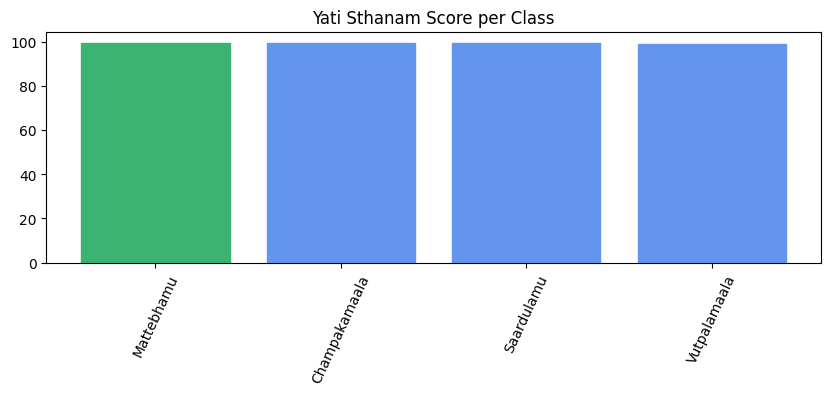

In [49]:
plt.figure( figsize= (10, 3) )
bars= plt.bar( range(len(n_aksharalu_score)), n_aksharalu_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Yati Sthanam Score per Class" )
plt.xticks( range(len(n_aksharalu_score)), [i.title() for i in n_aksharalu_score.keys() ], rotation= 65 )
plt.show()

In [51]:
prasa_score= (v_df.groupby( "type" )["prasa_score"].mean().sort_values( ascending= False )*100).to_dict()
prasa_score

{'saardulamu': 97.58620689655172,
 'mattebhamu': 96.51539708265803,
 'champakamaala': 95.69408740359897,
 'vutpalamaala': 94.6048632218845}

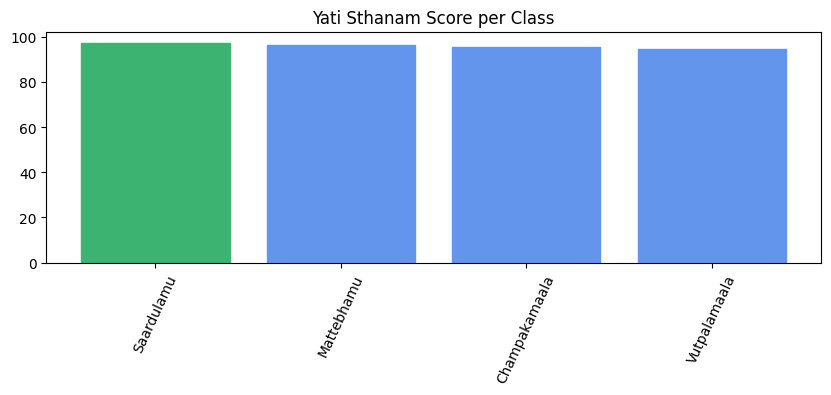

In [52]:
plt.figure( figsize= (10, 3) )
bars= plt.bar( range(len(prasa_score)), prasa_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Yati Sthanam Score per Class" )
plt.xticks( range(len(prasa_score)), [i.title() for i in prasa_score.keys() ], rotation= 65 )
plt.show()

### End
---